In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [14]:
df = pd.read_csv('income.csv')
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


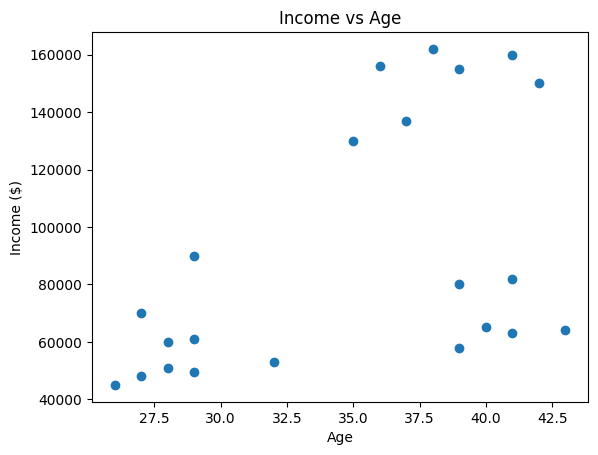

In [15]:
plt.scatter(df.Age,df['Income($)'])
plt.title('Income vs Age')
plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.show()

In [16]:
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [17]:
predicted=km.fit_predict(df[['Age','Income($)']])
predicted

array([0, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0],
      dtype=int32)

In [18]:
df['cluster'] = predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,0
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


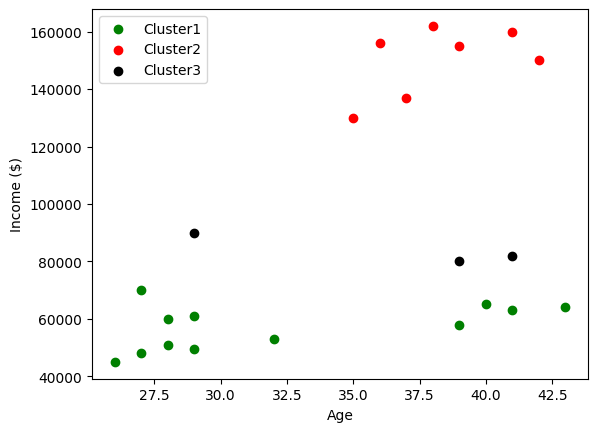

In [19]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')
plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend(['Cluster1','Cluster2','Cluster3'])
plt.show()

### From above graph we can see that cluster2 is okay but 1 and 3 are not correctly grouped this happens because of large difference between x axis data and y axis data I mean scalling is not done properly so to solve this problem we must scale our data first

## For test data don't use scaler.fit() method use fit method only on training data

In [20]:
scaler = MinMaxScaler()

In [21]:
scaled_data=scaler.fit_transform(df[['Income($)','Age']])
scaled_data

array([[0.21367521, 0.05882353],
       [0.38461538, 0.17647059],
       [0.13675214, 0.17647059],
       [0.12820513, 0.11764706],
       [0.8974359 , 0.94117647],
       [0.94017094, 0.76470588],
       [0.98290598, 0.88235294],
       [1.        , 0.70588235],
       [0.94871795, 0.58823529],
       [0.72649573, 0.52941176],
       [0.78632479, 0.64705882],
       [0.        , 0.        ],
       [0.02564103, 0.05882353],
       [0.05128205, 0.11764706],
       [0.03846154, 0.17647059],
       [0.06837607, 0.35294118],
       [0.17094017, 0.82352941],
       [0.15384615, 0.88235294],
       [0.16239316, 1.        ],
       [0.2991453 , 0.76470588],
       [0.31623932, 0.88235294],
       [0.11111111, 0.76470588]])

In [22]:
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,0
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


In [23]:
df[['Income($)','Age']] = scaled_data
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


In [24]:
y_predicted = km.fit_predict(df[['Income($)','Age']])
y_predicted

array([1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
      dtype=int32)

In [25]:
df['cluster'] = y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,2


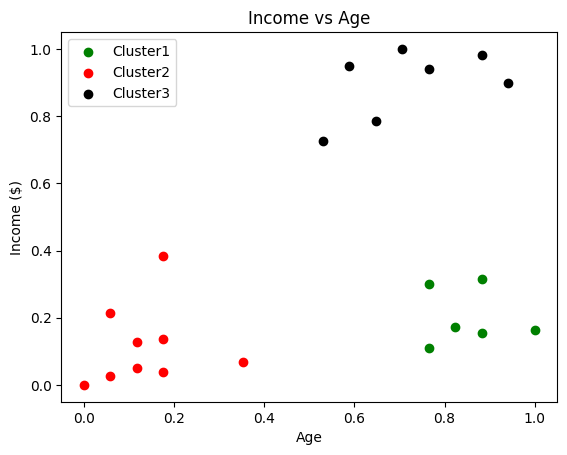

In [26]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')
plt.title('Income vs Age')
plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend(['Cluster1','Cluster2','Cluster3'])
plt.show()

## Elbow Method

In [29]:
k_range = range(1,10)
sse = []
for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(df[['Income($)','Age']])
    sse.append(km.inertia_)

In [30]:
sse

[5.434011511988179,
 2.091136388699078,
 0.4750783498553097,
 0.39237665288019463,
 0.336528430368078,
 0.22395807059250125,
 0.19429256406898143,
 0.16904071985327715,
 0.11377044584834492]

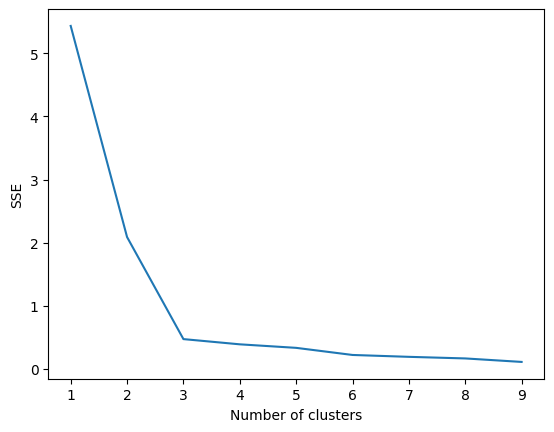

In [31]:
plt.plot(k_range,sse)
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

## From above graph you can see that elbow is at 3 so 3 clusters are best for the given data

## Exercise

In [32]:
from sklearn.datasets import load_iris

In [34]:
flowers = load_iris()
dir(flowers)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [35]:
flower_df = pd.DataFrame(flowers.data,columns=flowers.feature_names)
flower_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [36]:
flower_df = flower_df.drop(['sepal length (cm)','sepal width (cm)'],axis='columns')
flower_df.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [37]:
flower_df['target'] = flowers.target
flower_df.head()

,petal length (cm),petal width (cm),target
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0


In [38]:
flower_df['target_names'] = flower_df.target.apply(lambda x: flowers.target_names[x])
flower_df.head()

,petal length (cm),petal width (cm),target,target_names
0,1.4,0.2,0,setosa
1,1.4,0.2,0,setosa
2,1.3,0.2,0,setosa
3,1.5,0.2,0,setosa
4,1.4,0.2,0,setosa


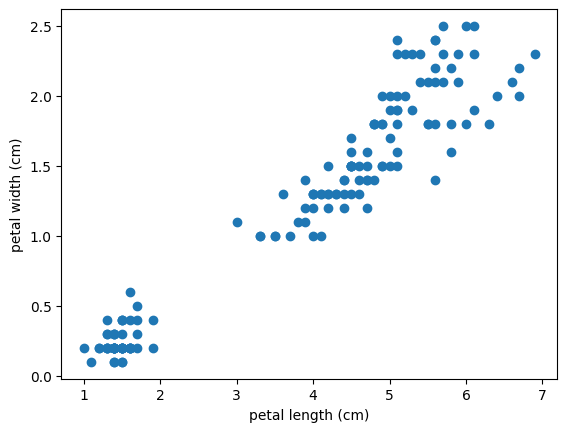

In [39]:
plt.scatter(flower_df['petal length (cm)'],flower_df['petal width (cm)'])
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.show()

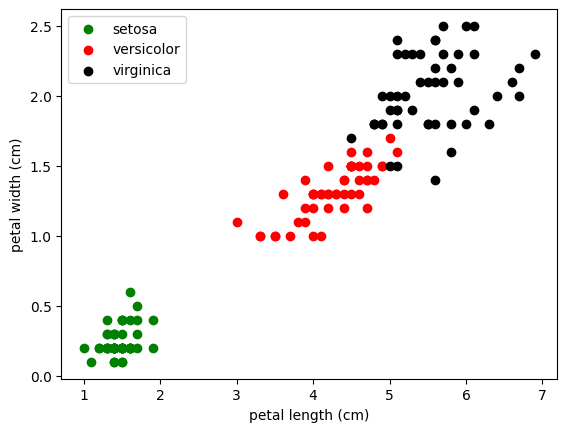

In [40]:
flower1 = flower_df[flower_df.target==0]
flower2 = flower_df[flower_df.target==1]
flower3 = flower_df[flower_df.target==2]
plt.scatter(flower1['petal length (cm)'],flower1['petal width (cm)'],color='green')
plt.scatter(flower2['petal length (cm)'],flower2['petal width (cm)'],color='red')
plt.scatter(flower3['petal length (cm)'],flower3['petal width (cm)'],color='black')
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.legend(['setosa','versicolor','virginica'])
plt.show()

In [41]:
k_range = range(1,10)
sse = []
for k in k_range:
  km = KMeans(n_clusters=k)
  km.fit(flower_df[['petal length (cm)','petal width (cm)']])
  sse.append(km.inertia_)

In [42]:
sse

[550.8953333333333,
 86.39021984551391,
 31.412885668276974,
 20.299607803485397,
 14.701112010796223,
 11.130143401561254,
 9.866436303827752,
 8.409975294743095,
 6.888599243893363]

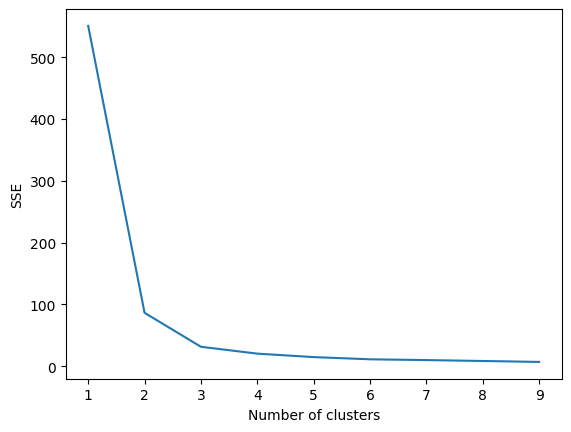

In [46]:
plt.plot(k_range,sse)
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

In [47]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(flower_df[['petal length (cm)','petal width (cm)']])
y_predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [48]:
flower_df['cluster'] =y_predicted
flower_df.head()

,petal length (cm),petal width (cm),target,target_names,cluster
0,1.4,0.2,0,setosa,1
1,1.4,0.2,0,setosa,1
2,1.3,0.2,0,setosa,1
3,1.5,0.2,0,setosa,1
4,1.4,0.2,0,setosa,1


In [49]:
flower_df.target_names.value_counts()

,count
target_names,
setosa,50
versicolor,50
virginica,50


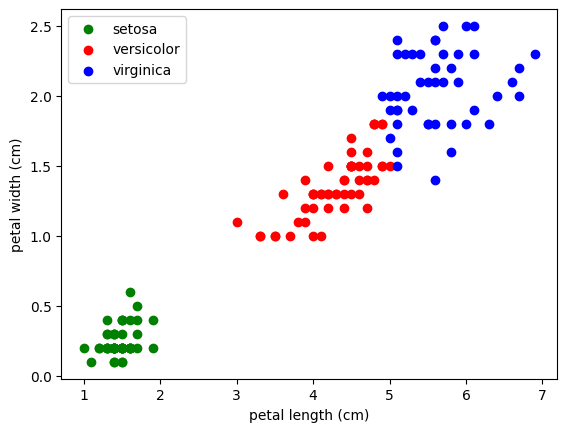

In [50]:
setosa = flower_df[flower_df.cluster==1]
versicolor = flower_df[flower_df.cluster==0]
virginica = flower_df[flower_df.cluster==2]
plt.scatter(setosa['petal length (cm)'],setosa['petal width (cm)'],color='green')
plt.scatter(versicolor['petal length (cm)'],versicolor['petal width (cm)'],color='red')
plt.scatter(virginica['petal length (cm)'],virginica['petal width (cm)'],color='blue')
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.legend(['setosa','versicolor','virginica'])
plt.show()